Засоби підготовки та аналізу даних

Лабораторна робота №4 Структури для роботи з великими обсягами даних в Python

Мета: отримати навички роботи із структурами для зберігання в Python (python, numpy, pandas, numpy array, dataframe, timeit)

Завдання першого рівня

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from timeit import timeit

In [5]:
data = pd.read_csv("household_power_consumption.txt", sep=';', low_memory=False, na_values='?')
data = data.dropna()

In [6]:
np_data = data.copy()
np_data = np_data.astype({
    'Global_active_power': 'float32',
    'Voltage': 'float32',
    'Global_intensity': 'float32',
    'Sub_metering_1': 'float32',
    'Sub_metering_2': 'float32',
    'Sub_metering_3': 'float32'
})
np_data_array = np_data.to_numpy()


In [7]:
pandas_task1 = timeit(lambda: data[data['Global_active_power'] > 5], number=10)
print("Час виконання Pandas (10 разів):", pandas_task1)

task1_numpy = timeit(lambda: np_data_array[np_data_array[:, 2] > 5], number=10)
print("Час виконання NumPy (10 разів):", task1_numpy)


Час виконання Pandas (10 разів): 0.05989189998945221
Час виконання NumPy (10 разів): 0.674639600008959


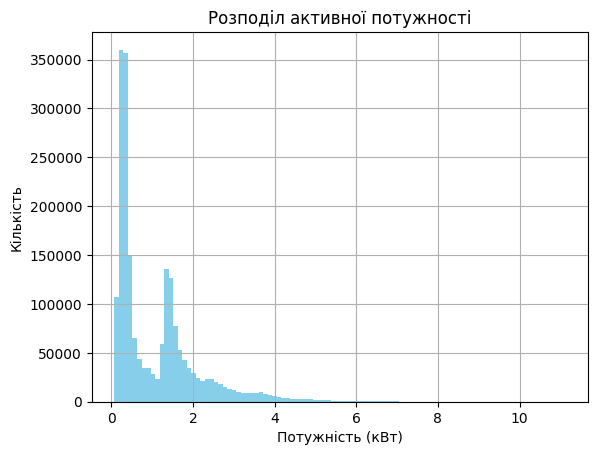

In [8]:
plt.hist(data['Global_active_power'], bins=100, color='skyblue')
plt.title("Розподіл активної потужності")
plt.xlabel("Потужність (кВт)")
plt.ylabel("Кількість")
plt.grid(True)
plt.show()


In [9]:
pandas_task2 = timeit(lambda: data[data['Voltage'] > 235], number=10)
print("Час виконання Pandas (10 разів):", pandas_task2)

task2_numpy = timeit(lambda: np_data_array[np_data_array[:, 4] > 235], number=10)
print("Час виконання NumPy (10 разів):", task2_numpy)


Час виконання Pandas (10 разів): 1.7121357999858446
Час виконання NumPy (10 разів): 2.9335338000091724


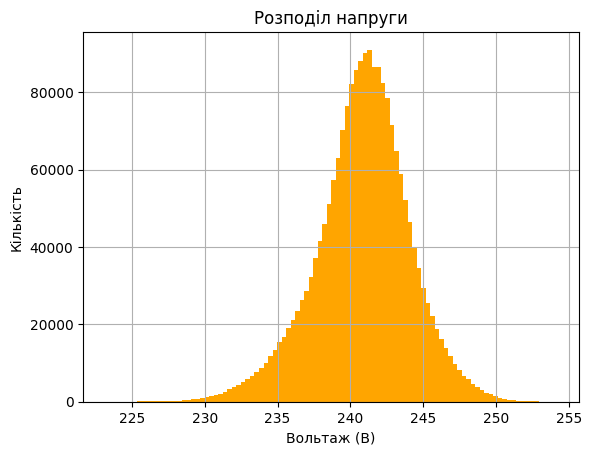

In [10]:
plt.hist(data['Voltage'], bins=100, color='orange')
plt.title("Розподіл напруги")
plt.xlabel("Вольтаж (В)")
plt.ylabel("Кількість")
plt.grid(True)
plt.show()


Кількість записів: 2509


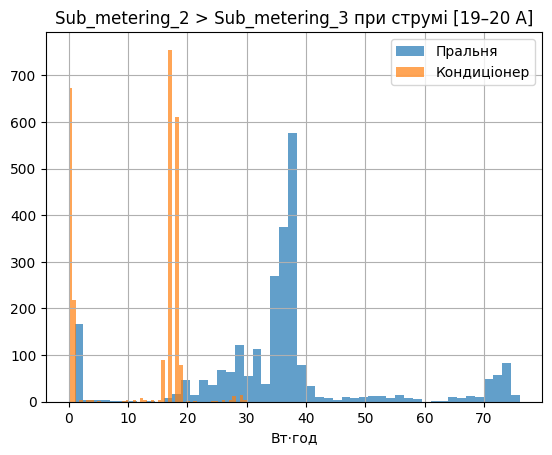

In [11]:
task3 = data[(data['Global_intensity'].between(19, 20)) &
             (data['Sub_metering_2'] > data['Sub_metering_3'])]
print("Кількість записів:", len(task3))

plt.hist(task3['Sub_metering_2'], bins=50, alpha=0.7, label='Пральня')
plt.hist(task3['Sub_metering_3'], bins=50, alpha=0.7, label='Кондиціонер')
plt.title("Sub_metering_2 > Sub_metering_3 при струмі [19–20 А]")
plt.xlabel("Вт·год")
plt.legend()
plt.grid(True)
plt.show()


Середнє по кожній групі:
 Sub_metering_1    1.133842
Sub_metering_2    1.296968
Sub_metering_3    6.457706
dtype: float64


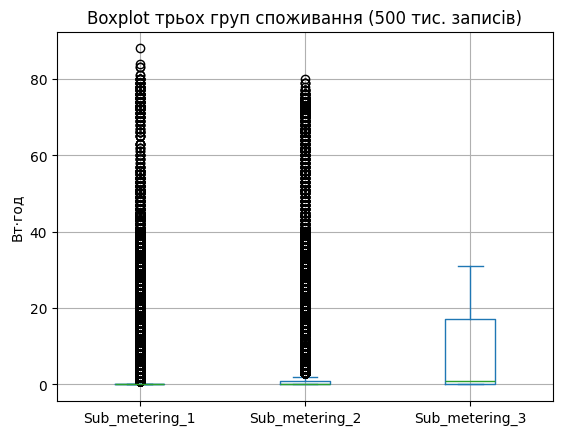

In [12]:
sample = data.sample(n=500_000, replace=False)
means = sample[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()
print("Середнє по кожній групі:\n", means)

sample[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].plot.box()
plt.title("Boxplot трьох груп споживання (500 тис. записів)")
plt.ylabel("Вт·год")
plt.grid(True)
plt.show()


In [13]:
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time
evening = data[data['Time'] >= pd.to_datetime('18:00:00').time()]
filtered = evening[evening['Global_active_power'] > 6]

filtered = filtered[(filtered['Sub_metering_2'] > filtered['Sub_metering_1']) &
                    (filtered['Sub_metering_2'] > filtered['Sub_metering_3'])]

# Обираємо кожен третій з першої половини та кожен четвертий з другої
half = len(filtered) // 2
every_third = filtered.iloc[:half:3]
every_fourth = filtered.iloc[half::4]
result = pd.concat([every_third, every_fourth])

print("Обрана кількість записів:", len(result))


Обрана кількість записів: 310
